Download data.tar.gz from https://tiny.cc/ + the full manuscript ID for part 1 (case sensitive), and untar and ungzip this into the directory "MCS/mcs" and make sure the output folder is "data" and it has a folder named "track_data". Examine the code to see the proper location if you are getting an error (i.e., "../data/track_data/")

# Generate occurrence maps for the various perturbations

No need to do this first cell yourself, since these data already exist in the data folder.

# 2015 MCS Occurrence

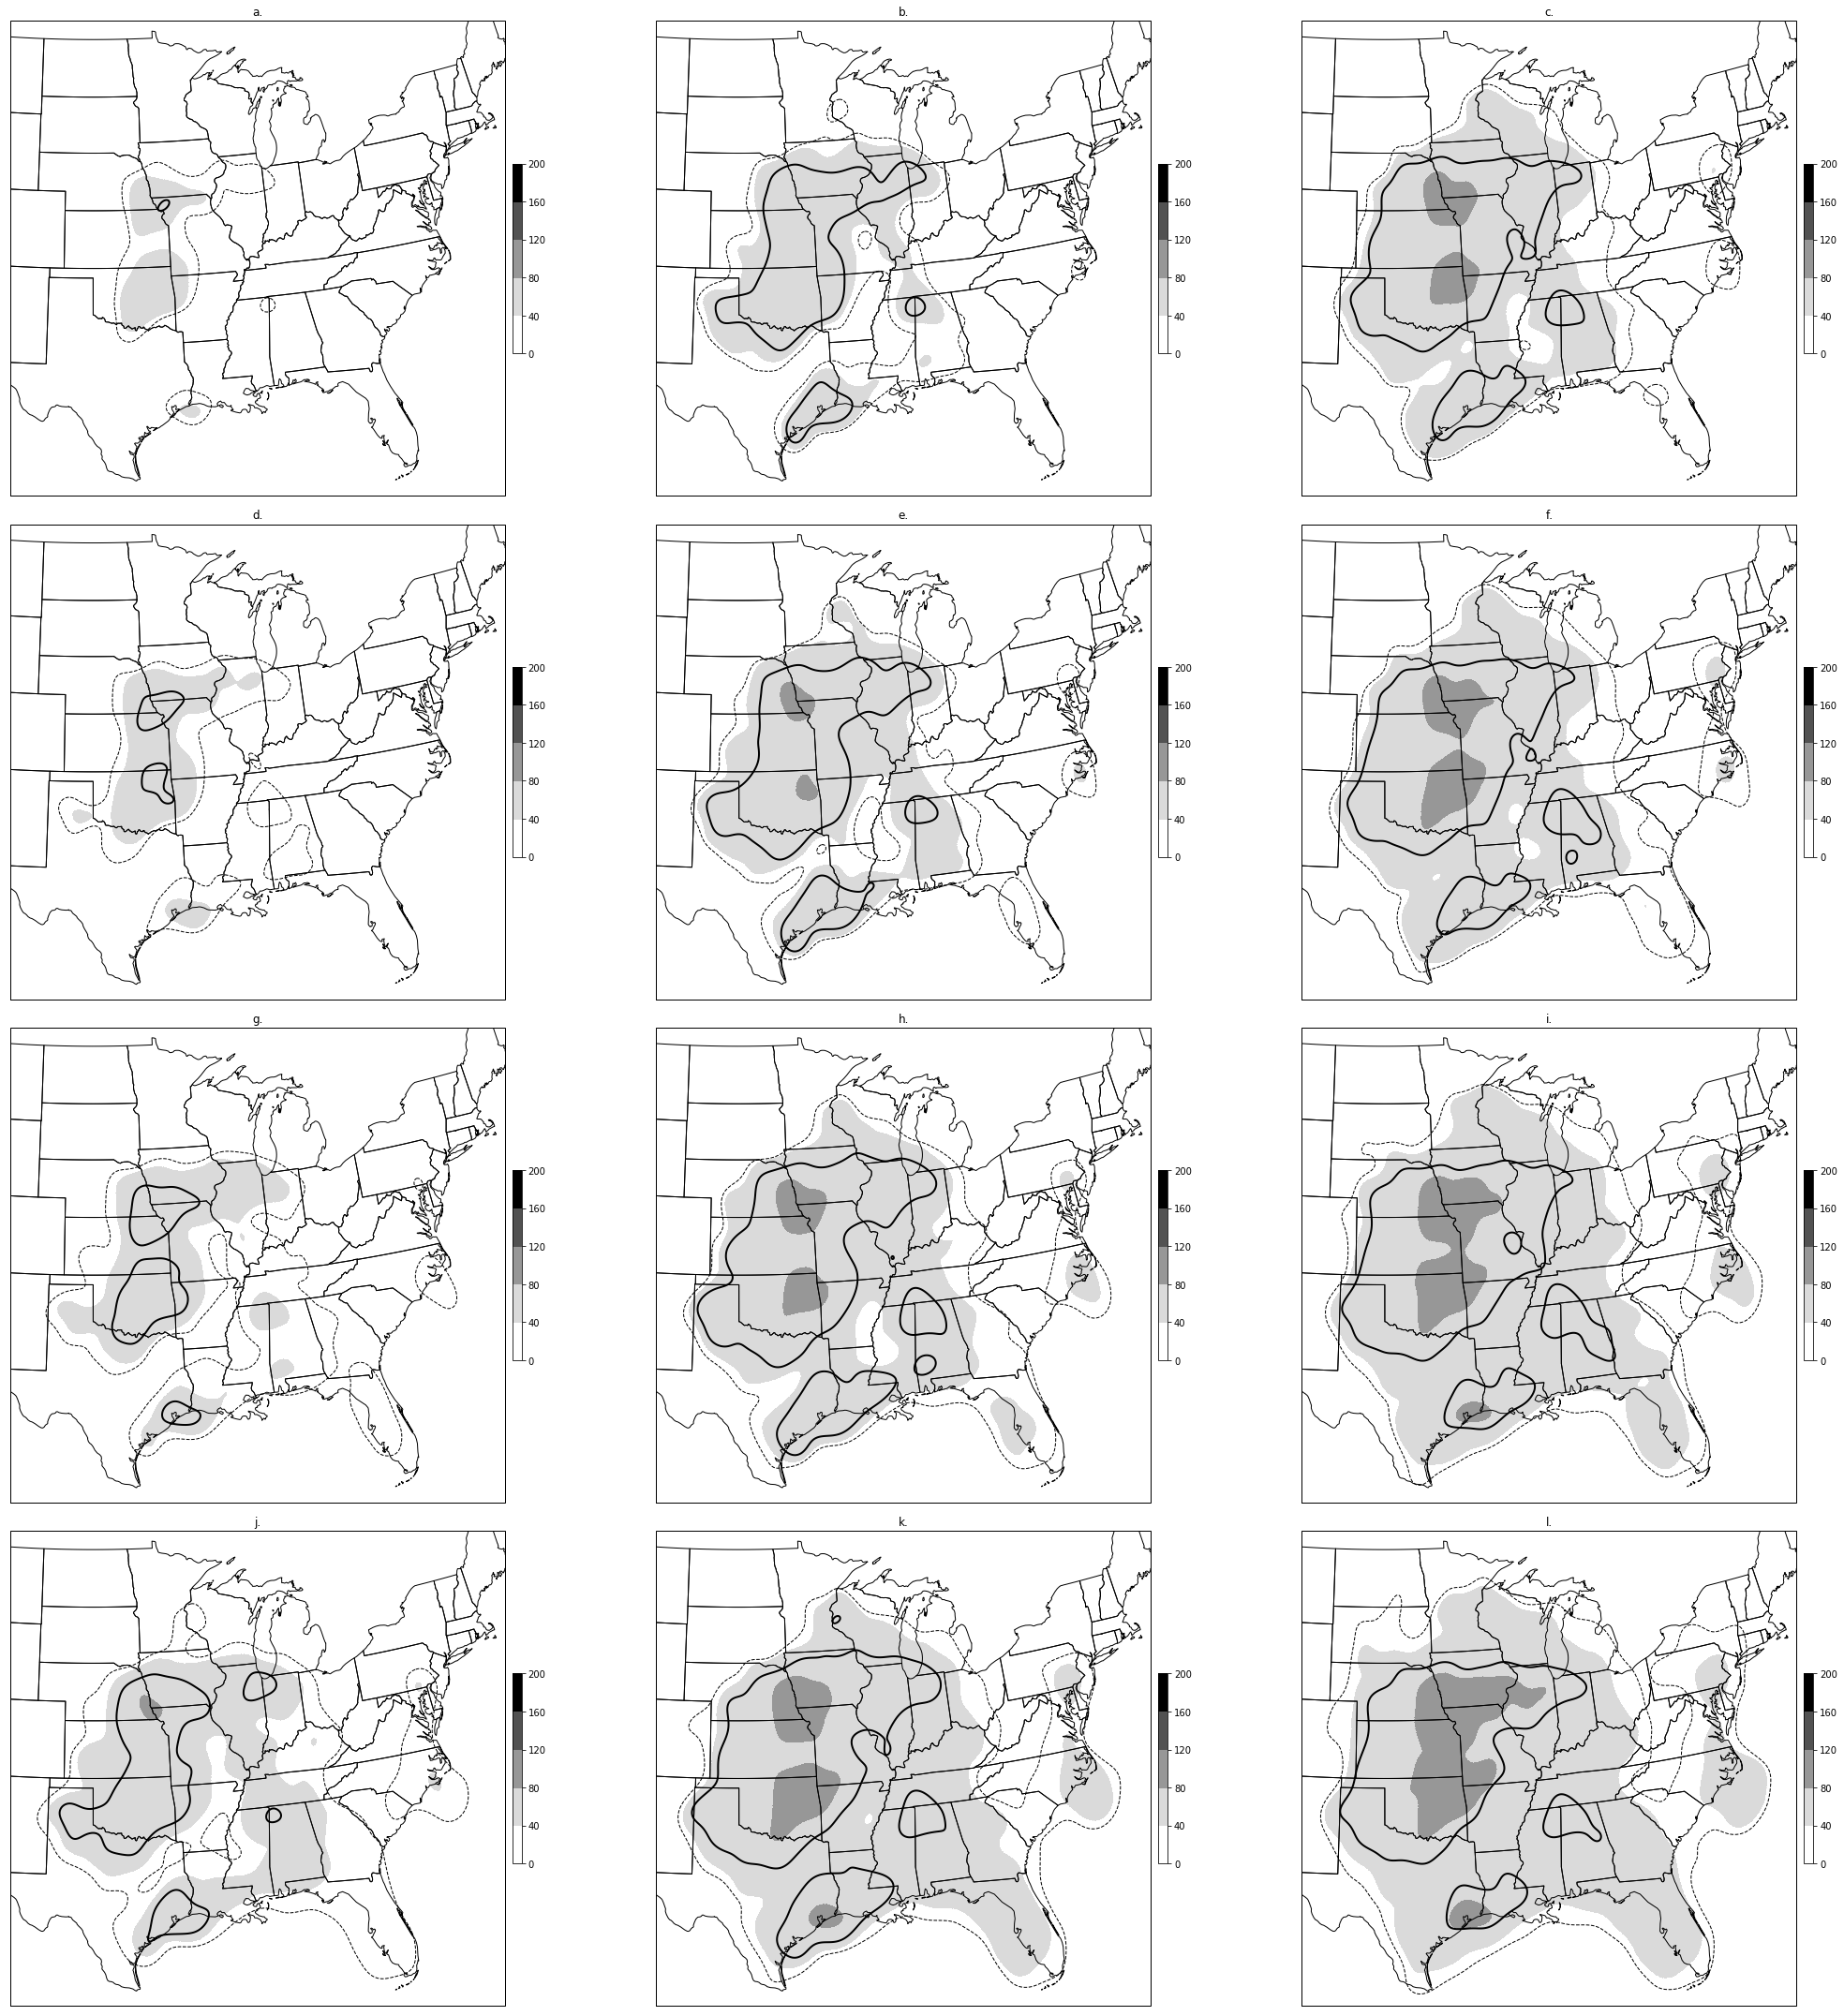

In [1]:
import sys
sys.path.append("C:/Users/ahaberlie/Documents/GitHub/MCS/")

import pickle
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from mcs.utils.mapping_help import get_NOWrad_conus_lon_lat
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from string import ascii_lowercase

import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = 30, 30

from_proj = ccrs.PlateCarree()
to_proj = ccrs.AlbersEqualArea(central_longitude=-100.0000, central_latitude=38.0000)

lons, lats = get_NOWrad_conus_lon_lat()

lons, lats = np.meshgrid(lons, lats)

splot = 1

year = 2015

track_occur_dir = "../data/track_data/occurrence/"

for crsr in [6, 12, 24, 48]:
    for ssr in [48, 96, 192]:
        
        ax = plt.subplot(4, 3, splot, projection=to_proj)
        ax.set_extent([-105, -75, 25, 48])
        shapename = 'admin_1_states_provinces_lakes_shp'
        states_shp = shpreader.natural_earth(resolution='50m',
                                             category='cultural', name=shapename)

        for state, info in zip(shpreader.Reader(states_shp).geometries(), 
                               shpreader.Reader(states_shp).records()):
            if info.attributes['admin'] == 'United States of America':

                ax.add_geometries([state], ccrs.PlateCarree(),
                                  facecolor='None', edgecolor='k')
        
        pdict = {'p0.00':None, 'p0.50': None, 'p0.90': None, 'p0.95': None}
        
        for p, ps in zip([0.0, 0.5, 0.95], ['0.00', '0.50', '0.95']):
            
            prom = pickle.load(open(track_occur_dir + str(year) + "/" + str(crsr).zfill(2) + "_" \
                                    + str(ssr) + "_p" + str(int(100*p)) + "_rematched_mjjas.pkl", "rb"))

            pdict["p" + ps] = prom

        cmap = plt.cm.Greys
        classes = list(range(0, 225, 40))
        norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

        #Since each count is a 15 minute window, divide by 4 to get number of hours
        m50_ = gaussian_filter(pdict['p0.50']/4, 30)

        mmp = ax.pcolormesh(lons, lats, m50_, transform=from_proj, norm=norm, cmap=cmap)
        
        plt.colorbar(mmp, ax=ax, shrink=0.4, pad=0.01)

        m0_ = gaussian_filter(pdict['p0.00']/4, 30)
        m95_ = gaussian_filter(pdict['p0.95']/4, 30)

        l1 = ax.contour(lons, lats, m0_, levels=[40], colors=['k',], 
                          transform=from_proj, linestyles='dashed', linewidths=1)

        l3 = ax.contour(lons, lats, m95_, levels=[40], colors=['k',], 
                          transform=from_proj, linewidths=2)
        
        ax.set_title(ascii_lowercase[splot-1] + ".")
        
        splot += 1
plt.tight_layout()

# 2016 MCS Occurrence

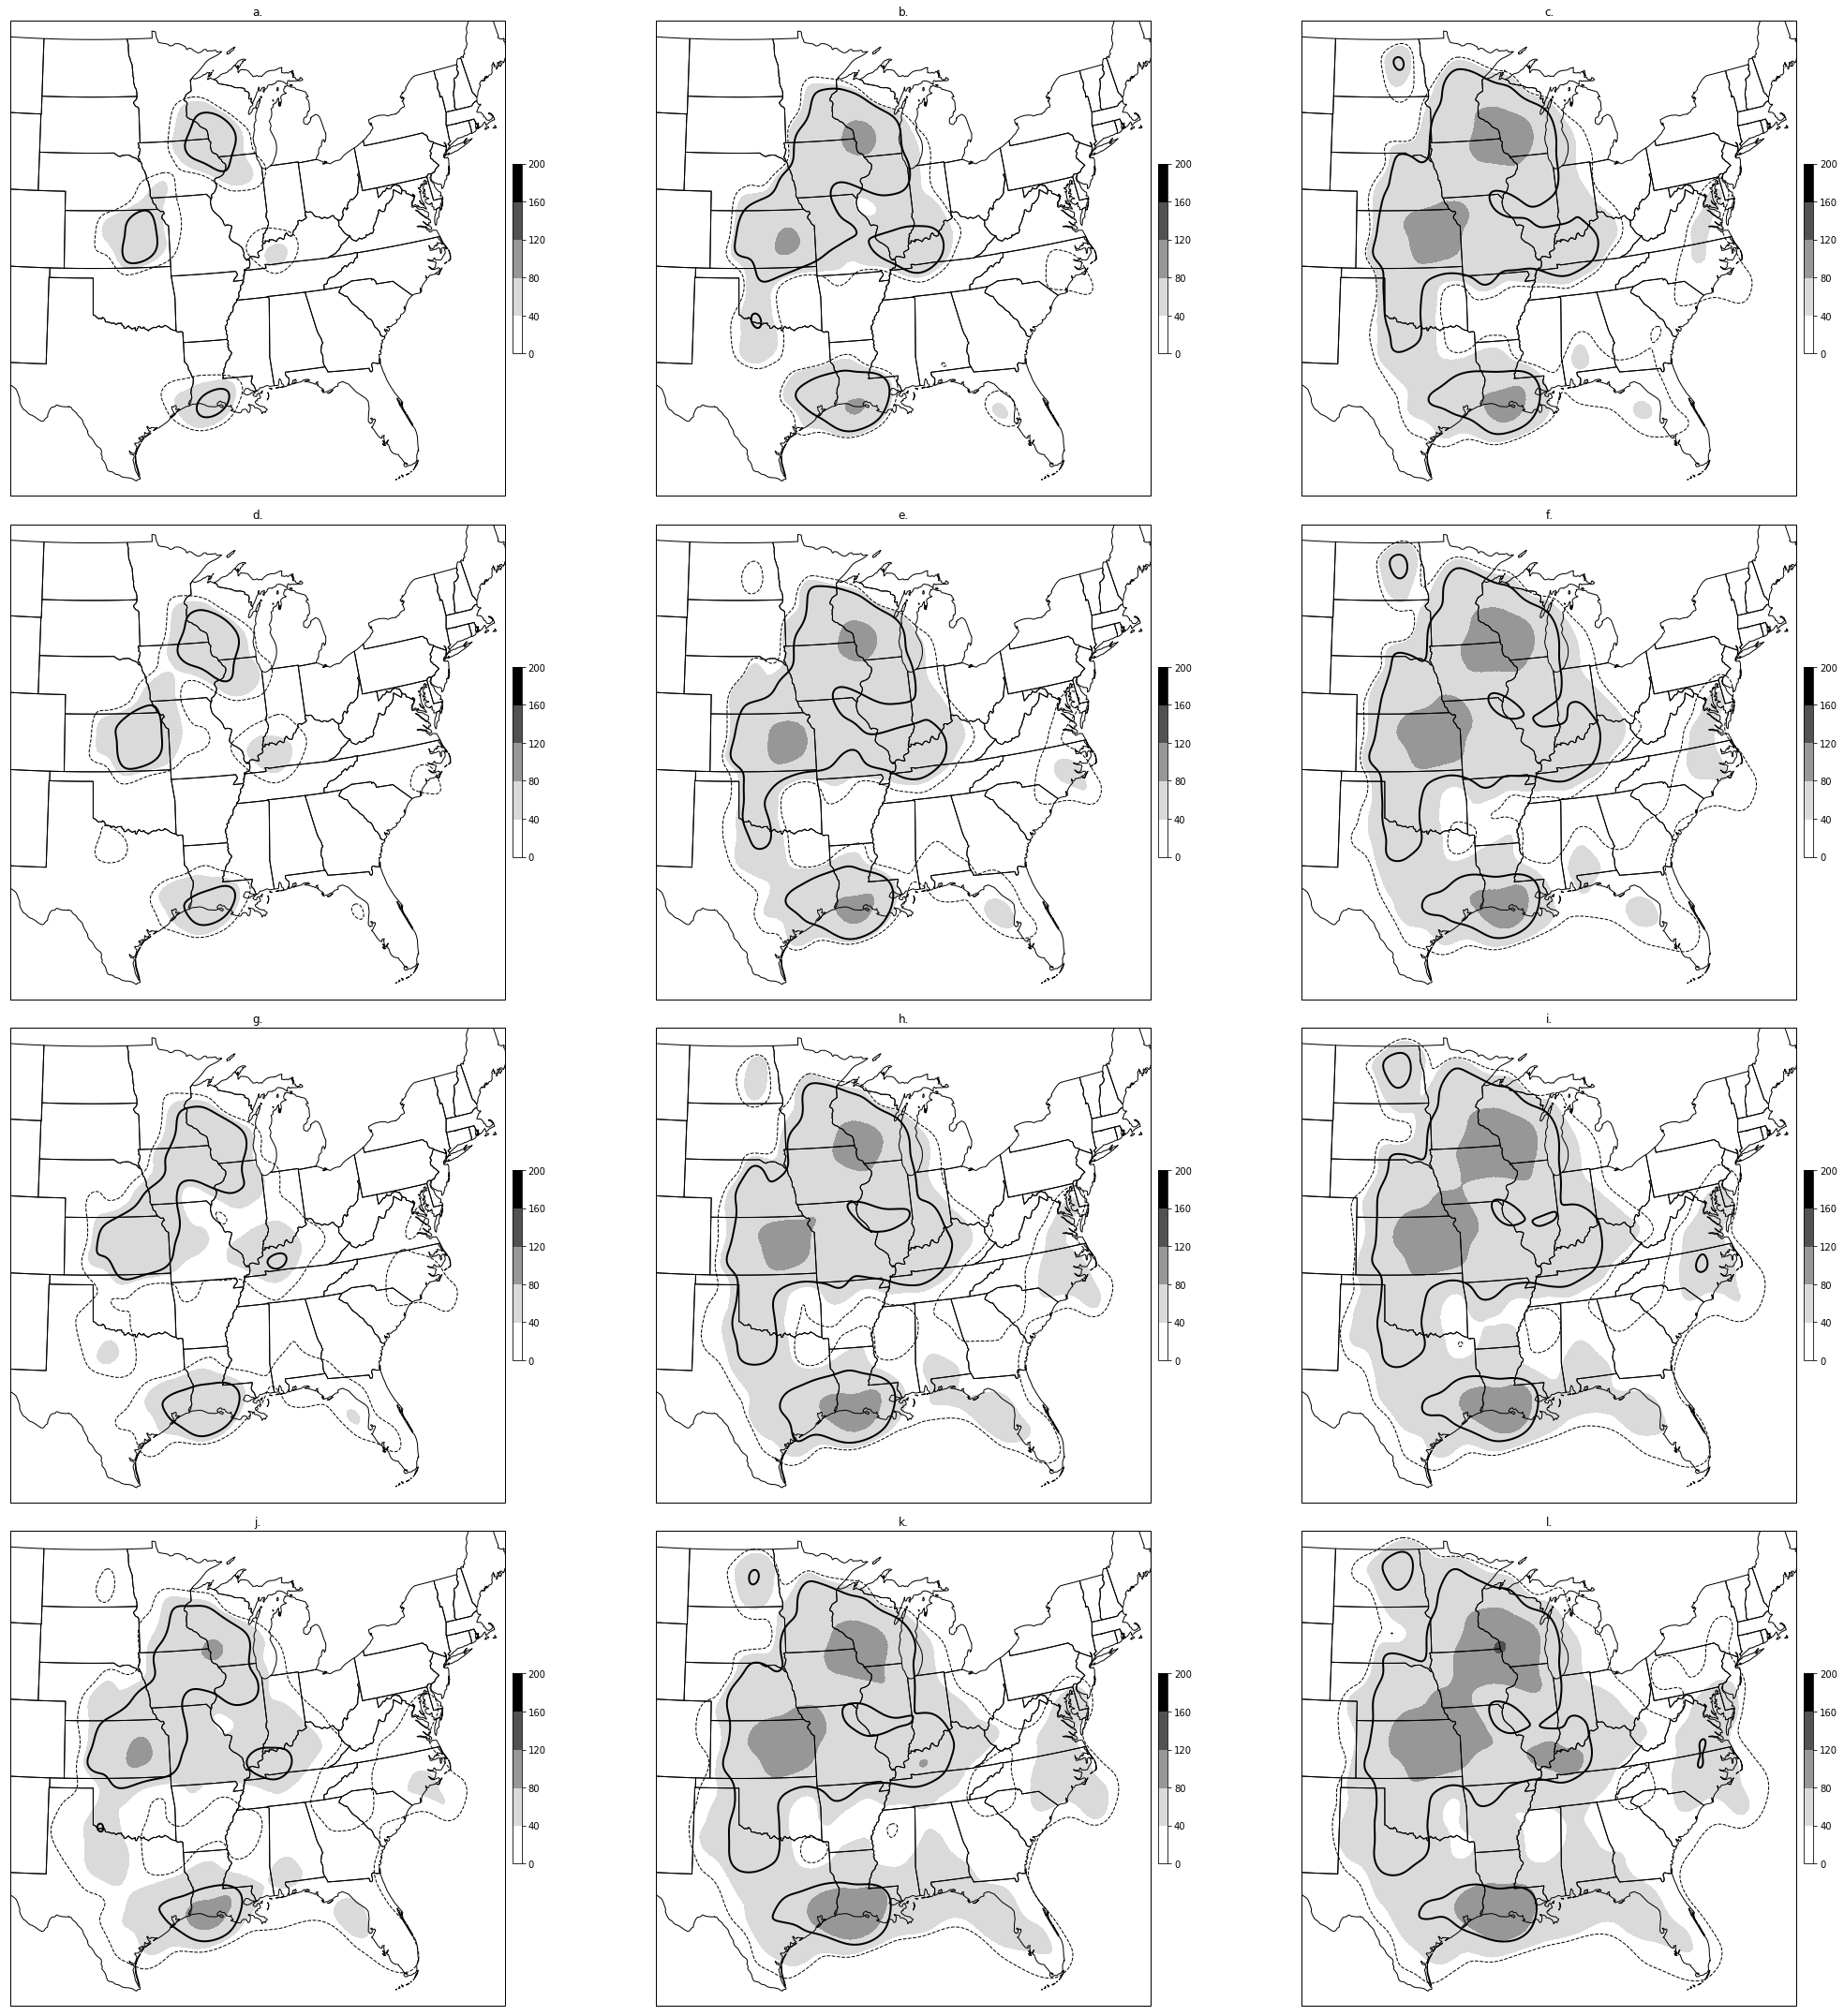

In [2]:
import sys
sys.path.append("C:/Users/ahaberlie/Documents/GitHub/MCS/")

import pickle
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from mcs.utils.mapping_help import get_NOWrad_conus_lon_lat
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from string import ascii_lowercase

import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = 30, 30

from_proj = ccrs.PlateCarree()
to_proj = ccrs.AlbersEqualArea(central_longitude=-100.0000, central_latitude=38.0000)

lons, lats = get_NOWrad_conus_lon_lat()

lons, lats = np.meshgrid(lons, lats)

splot = 1

year = 2016

track_occur_dir = "../data/track_data/occurrence/"

for crsr in [6, 12, 24, 48]:
    for ssr in [48, 96, 192]:
        
        ax = plt.subplot(4, 3, splot, projection=to_proj)
        ax.set_extent([-105, -75, 25, 48])
        shapename = 'admin_1_states_provinces_lakes_shp'
        states_shp = shpreader.natural_earth(resolution='50m',
                                             category='cultural', name=shapename)

        for state, info in zip(shpreader.Reader(states_shp).geometries(), 
                               shpreader.Reader(states_shp).records()):
            if info.attributes['admin'] == 'United States of America':

                ax.add_geometries([state], ccrs.PlateCarree(),
                                  facecolor='None', edgecolor='k')
        
        pdict = {'p0.00':None, 'p0.50': None, 'p0.90': None, 'p0.95': None}
        
        for p, ps in zip([0.0, 0.5, 0.95], ['0.00', '0.50', '0.95']):
            
            prom = pickle.load(open(track_occur_dir + str(year) + "/" + str(crsr).zfill(2) + "_" \
                                    + str(ssr) + "_p" + str(int(100*p)) + "_rematched_mjjas.pkl", "rb"))

            pdict["p" + ps] = prom

        cmap = plt.cm.Greys
        classes = list(range(0, 225, 40))
        norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

        #Since each count is a 15 minute window, divide by 4 to get number of hours
        m50_ = gaussian_filter(pdict['p0.50']/4, 30)

        mmp = ax.pcolormesh(lons, lats, m50_, transform=from_proj, norm=norm, cmap=cmap)
        
        plt.colorbar(mmp, ax=ax, shrink=0.4, pad=0.01)

        m0_ = gaussian_filter(pdict['p0.00']/4, 30)
        m95_ = gaussian_filter(pdict['p0.95']/4, 30)

        l1 = ax.contour(lons, lats, m0_, levels=[40], colors=['k',], 
                          transform=from_proj, linestyles='dashed', linewidths=1)

        l3 = ax.contour(lons, lats, m95_, levels=[40], colors=['k',], 
                          transform=from_proj, linewidths=2)
        
        ax.set_title(ascii_lowercase[splot-1] + ".")
        
        splot += 1
plt.tight_layout()

# PECAN occurrence (Jun 1 - Jul 15 2015)

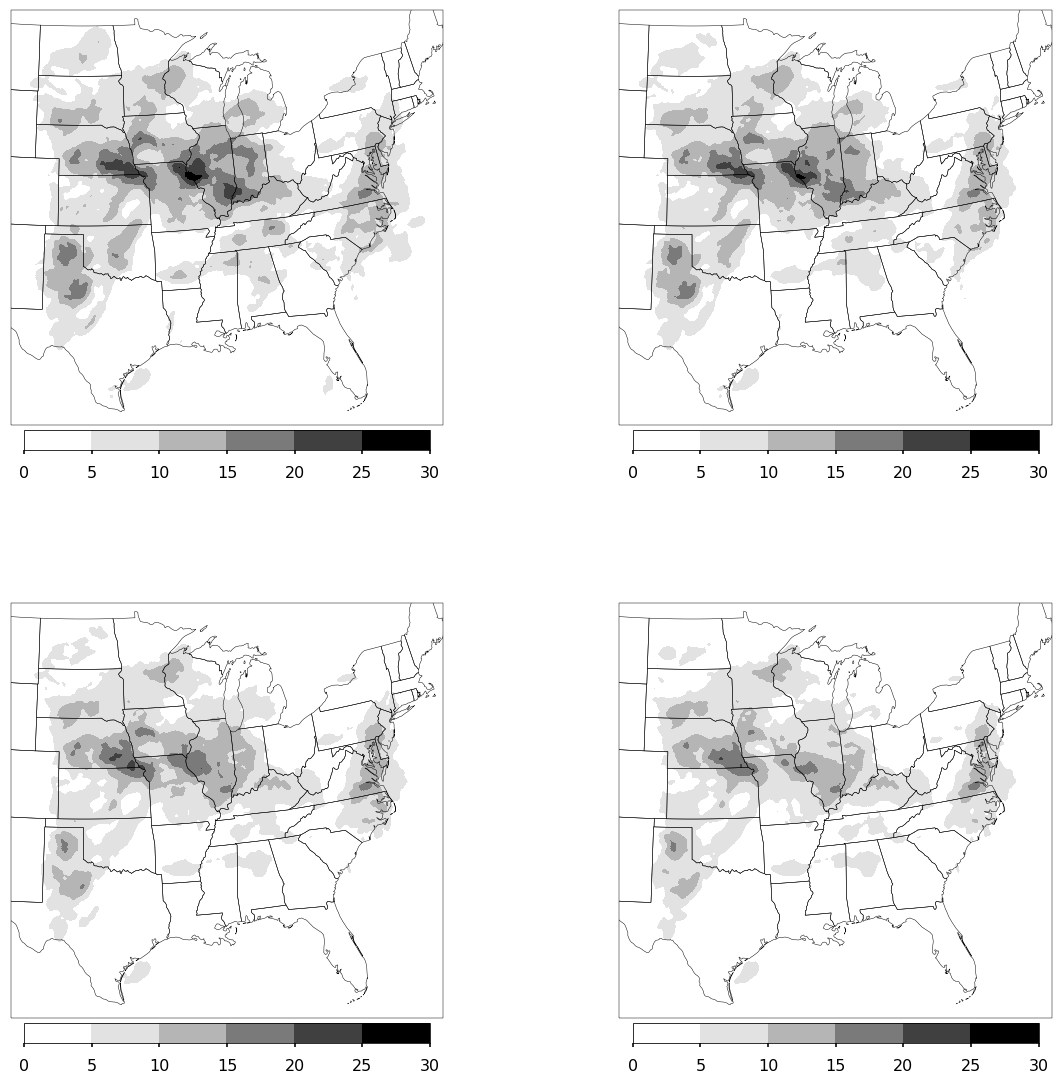

In [3]:
import sys
sys.path.append("C:/Users/ahaberlie/Documents/GitHub/MCS_Tracking/")

import cartopy
import cartopy.crs as ccrs
from scipy.misc import imread
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import matplotlib.patches as mpatches
import matplotlib.patheffects as pe
from mcs.geography.mapping_help import *
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

plt.style.use('seaborn-poster')

import cartopy.io.shapereader as shpreader

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 20, 20

from_proj = ccrs.PlateCarree()
to_proj = ccrs.AlbersEqualArea(central_longitude=-100.0000, central_latitude=38.0000)

cmap = plt.cm.Greys
classes = list(range(0, 35, 5))
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

crsr = 24
ssr = 96

pecan_data = "../data/track_data/occurrence/PECAN/"

pref = "100_" + str(crsr) + "_" + str(ssr) + "_"

for splot, (pr, prob) in enumerate(zip(['0.0', '0.5', '0.9', '0.95'], 
                                       ['p0', 'p50', 'p90', 'p95'])):

    ax = plt.subplot(2, 2, splot+1, projection=to_proj)
    ax.set_extent([-105, -75, 25, 48])
    shapename = 'admin_1_states_provinces_lakes_shp'
    states_shp = shpreader.natural_earth(resolution='50m',
                                         category='cultural', name=shapename)

    for state, info in zip(shpreader.Reader(states_shp).geometries(), 
                           shpreader.Reader(states_shp).records()):
        if info.attributes['admin'] == 'United States of America':

            ax.add_geometries([state], ccrs.PlateCarree(),
                              facecolor='None', edgecolor='k')

    prom = pickle.load(open(pecan_data + pref + pr + "_pecannight_climo.pkl", "rb"))

    m50_ = gaussian_filter(prom/4, 5)

    mmp = ax.pcolormesh(lons, lats, m50_, transform=from_proj, norm=norm, cmap=cmap)

    plt.colorbar(mmp, ax=ax, shrink=.8, pad=0.01, orientation='horizontal')

# Read file information for each valid 15-min period

In [4]:
import sys
sys.path.append("C:/Users/ahaberlie/Documents/GitHub/MCS_Tracking/")

import pandas as pd

from mcs.format.formatting import to_datetime

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 15


file_location = "../data/slice_data/2015/"

dfs = []
for pref in ['6_48', '12_48', '24_48', '48_48', 
             '6_96', '12_96', '24_96', '48_96',
             '6_192', '12_192', '24_192', '48_192']:

    for i in range(5, 10):

        df = pd.DataFrame.from_csv(file_location + "100_" + pref + "/" + str(i) + "file_info.csv")
        
        df['CRSR'] = pref.split("_")[0]
        
        df['SSR'] = pref.split("_")[1]
        
        dfs.append(df)
           
file_info = pd.concat(dfs, ignore_index=True)

file_info = file_info.apply(pd.to_numeric, errors='ignore')

file_info['datetime'] = pd.to_datetime(file_info.datetime)
file_info = file_info.set_index('datetime')

C:\Users\ahaberlie\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


# Time series

C:\Users\ahaberlie\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  """


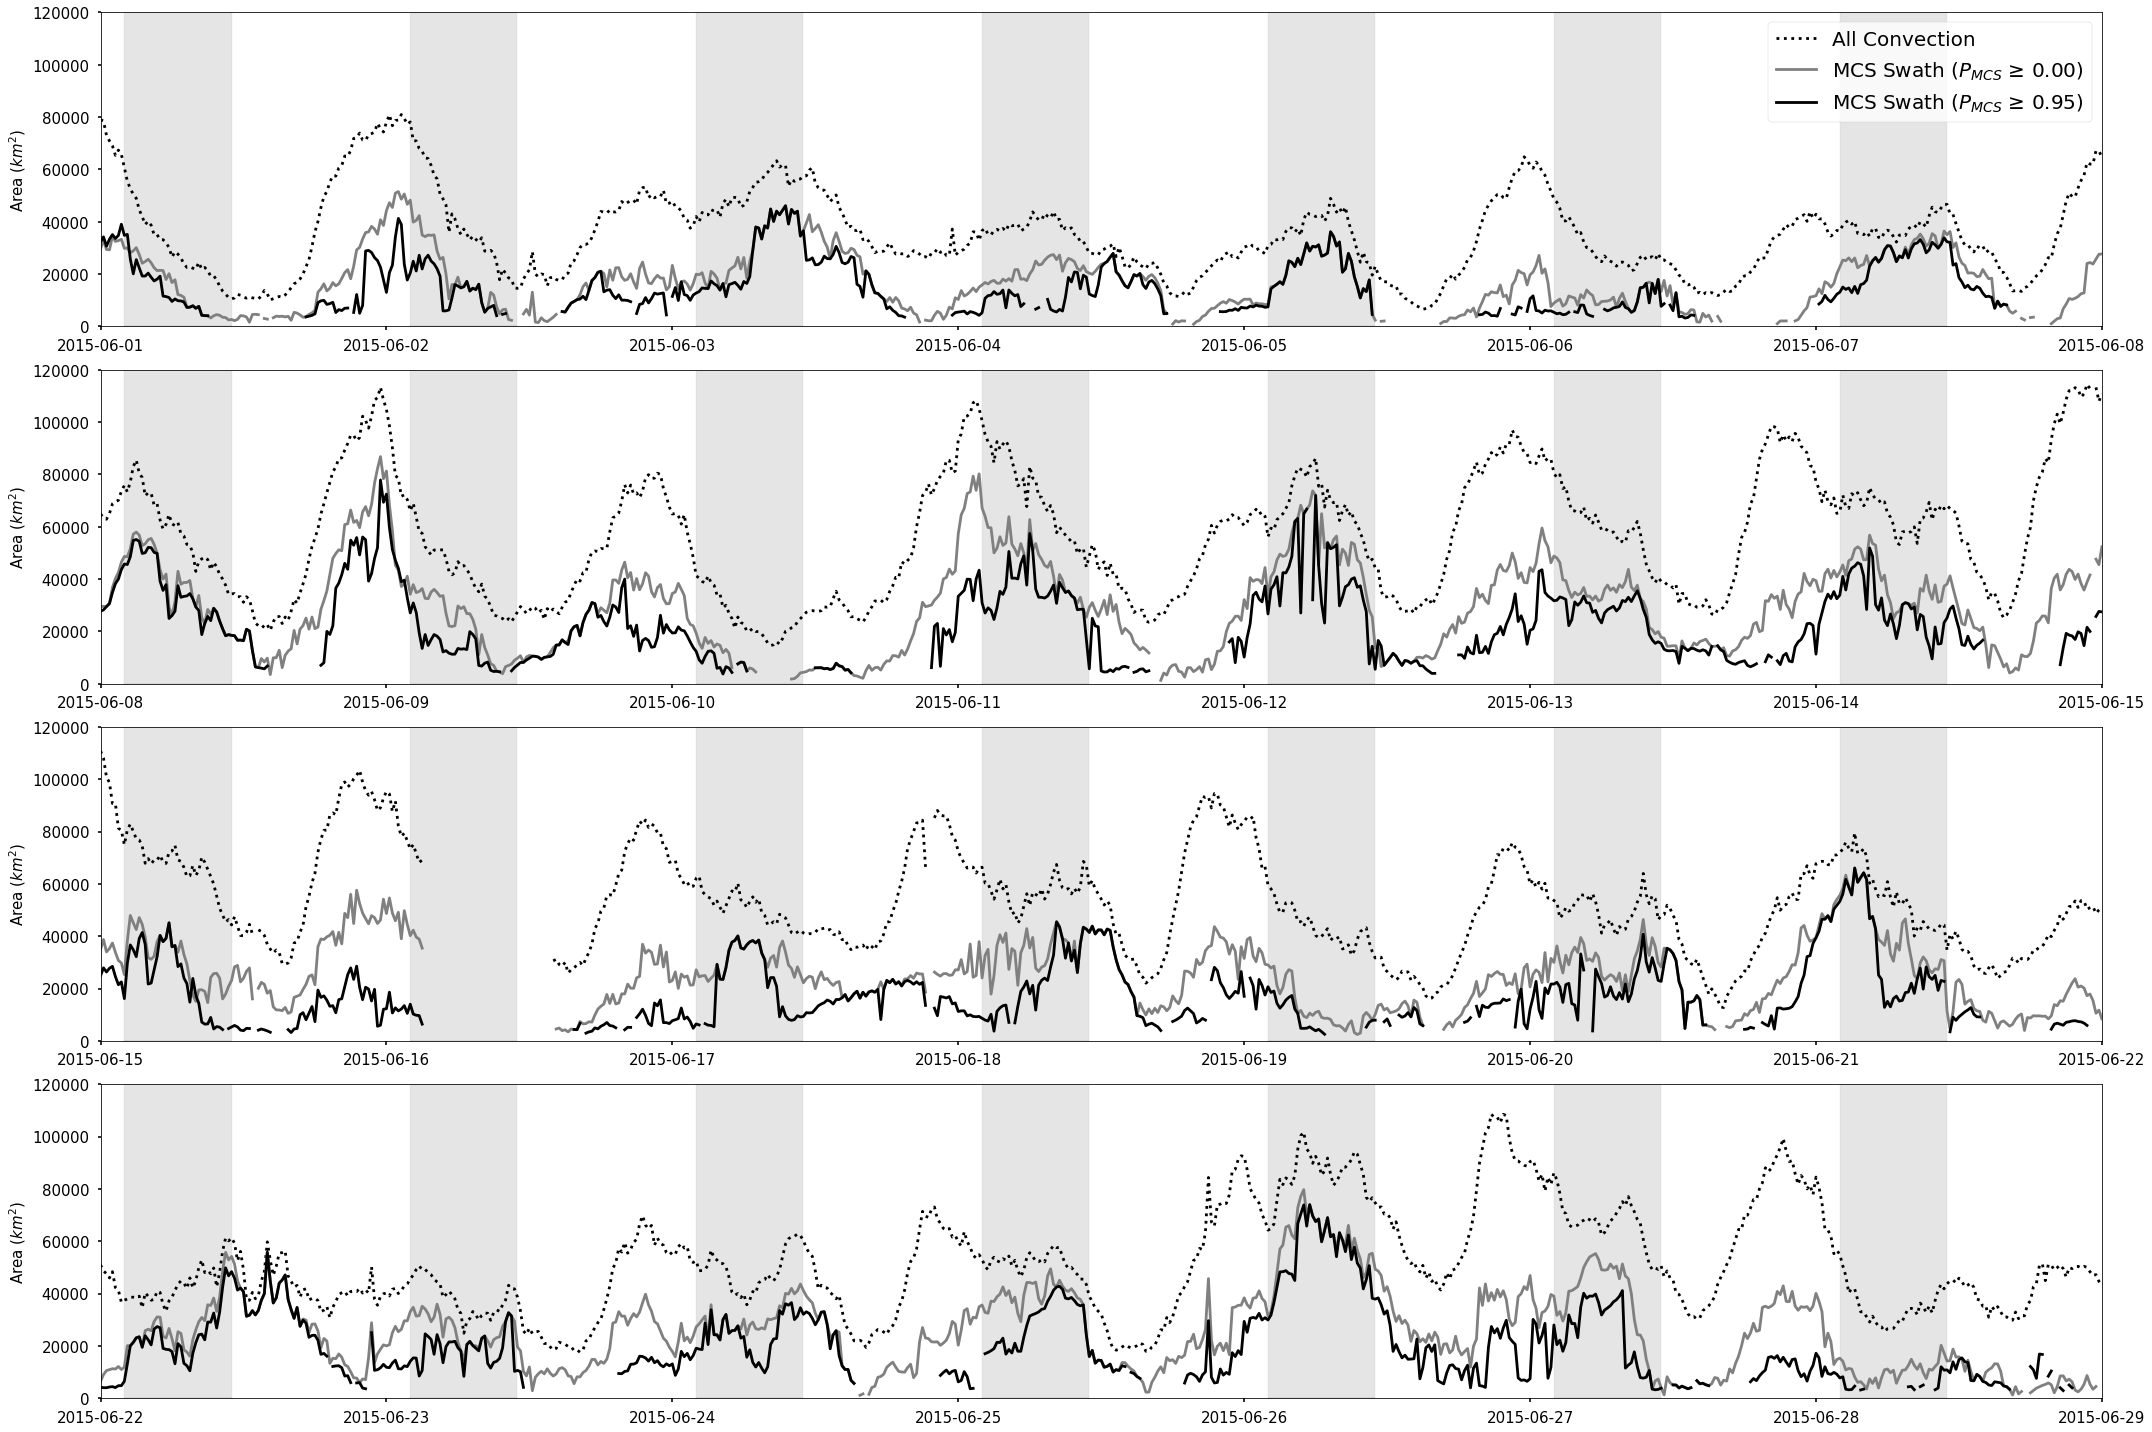

In [5]:
import matplotlib.dates as mdates
import datetime
import pickle
from pandas.tseries import converter as pdtc
pdtc.register()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 30, 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'

def duration(x):

    return (x[-1] - x[0]).total_seconds() / 3600

def set_durations(df):
    grouped = df.groupby('storm_num')
    df['duration'] = grouped['storm_num'].transform(lambda x: duration(x.index))
    return df

def get_track_data(start, end, crsr, ssr, p):
    
    year = start.year
    fn = "../data/track_data/rematched/" + str(year) + "/" + str(year) +"_" 
    fn += str(crsr).zfill(2) + "_" + str(ssr).zfill(3) + "_p" + str(int(p*100)).zfill(2) + ".pkl"
    df = pickle.load(open(fn, 'rb'))
    df = df[df.major_axis_length >= 100]
    df['datetime'] = pd.to_datetime(df.datetime)
    df = df.set_index('datetime')
    df = df[(df.index >= start) & (df.index <= end)]
    return df

crsr = 24
ssr = 96
p = 0

for splot, date in enumerate([1, 8, 15, 22]):
    
    ax = plt.subplot(4, 1, splot+1)
    
    stime = datetime.datetime(2015, 6, date, 0, 0)
    etime = datetime.datetime(2015, 6, date+7, 0, 0)

    fi = file_info[(file_info.CRSR==crsr) & \
                   (file_info.SSR==ssr) & \
                   (file_info.index >= stime) & \
                   (file_info.index <= etime)]

    df_0_15 = fi.resample('15Min').sum()

    plt.plot(df_0_15.index.values, 4*df_0_15.conv_area.values, 'k:', label='All Convection')

    df_0 = get_track_data(stime, etime, crsr, ssr, p=0.0)
    df_0 = set_durations(df_0)
    df_0 = df_0[df_0.duration >= 3]

    df_0_15 = df_0.resample('15Min').sum()

    ax.plot(df_0_15.index.values, df_0_15.convection_area.values, '-', 
             color='grey', label="MCS Swath (" + r'$P_{MCS}$' + " ≥ 0.00)")


    df_95 = get_track_data(stime, etime, crsr, ssr, p=0.95)
    df_95 = set_durations(df_95)
    df_95 = df_95[df_95.duration >= 3]

    df_95_15 = df_95.resample('15Min').sum()

    ax.plot(df_95_15.index.values, df_95_15.convection_area.values, 'k-', 
              label="MCS Swath (" + r'$P_{MCS}$' + " ≥ 0.95)")


    s = stime + datetime.timedelta(hours=2)
    e = stime + datetime.timedelta(hours=11)

    while s < etime:

        ax.fill_between([s, e, e, s, s], [0, 0, 200000, 200000, 0], color='grey', alpha=0.2)

        s += datetime.timedelta(hours=24)
        e += datetime.timedelta(hours=24)

    ax.set_ylim(0, 120000)
    ax.set_xlim(stime, etime)
    ax.set_ylabel("Area (" + r'$km^2$' + ")", fontsize=15)
    
    if splot == 0:
        ax.legend(prop={'size': 20})
    
plt.tight_layout()

# July, just for fun.

C:\Users\ahaberlie\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  """


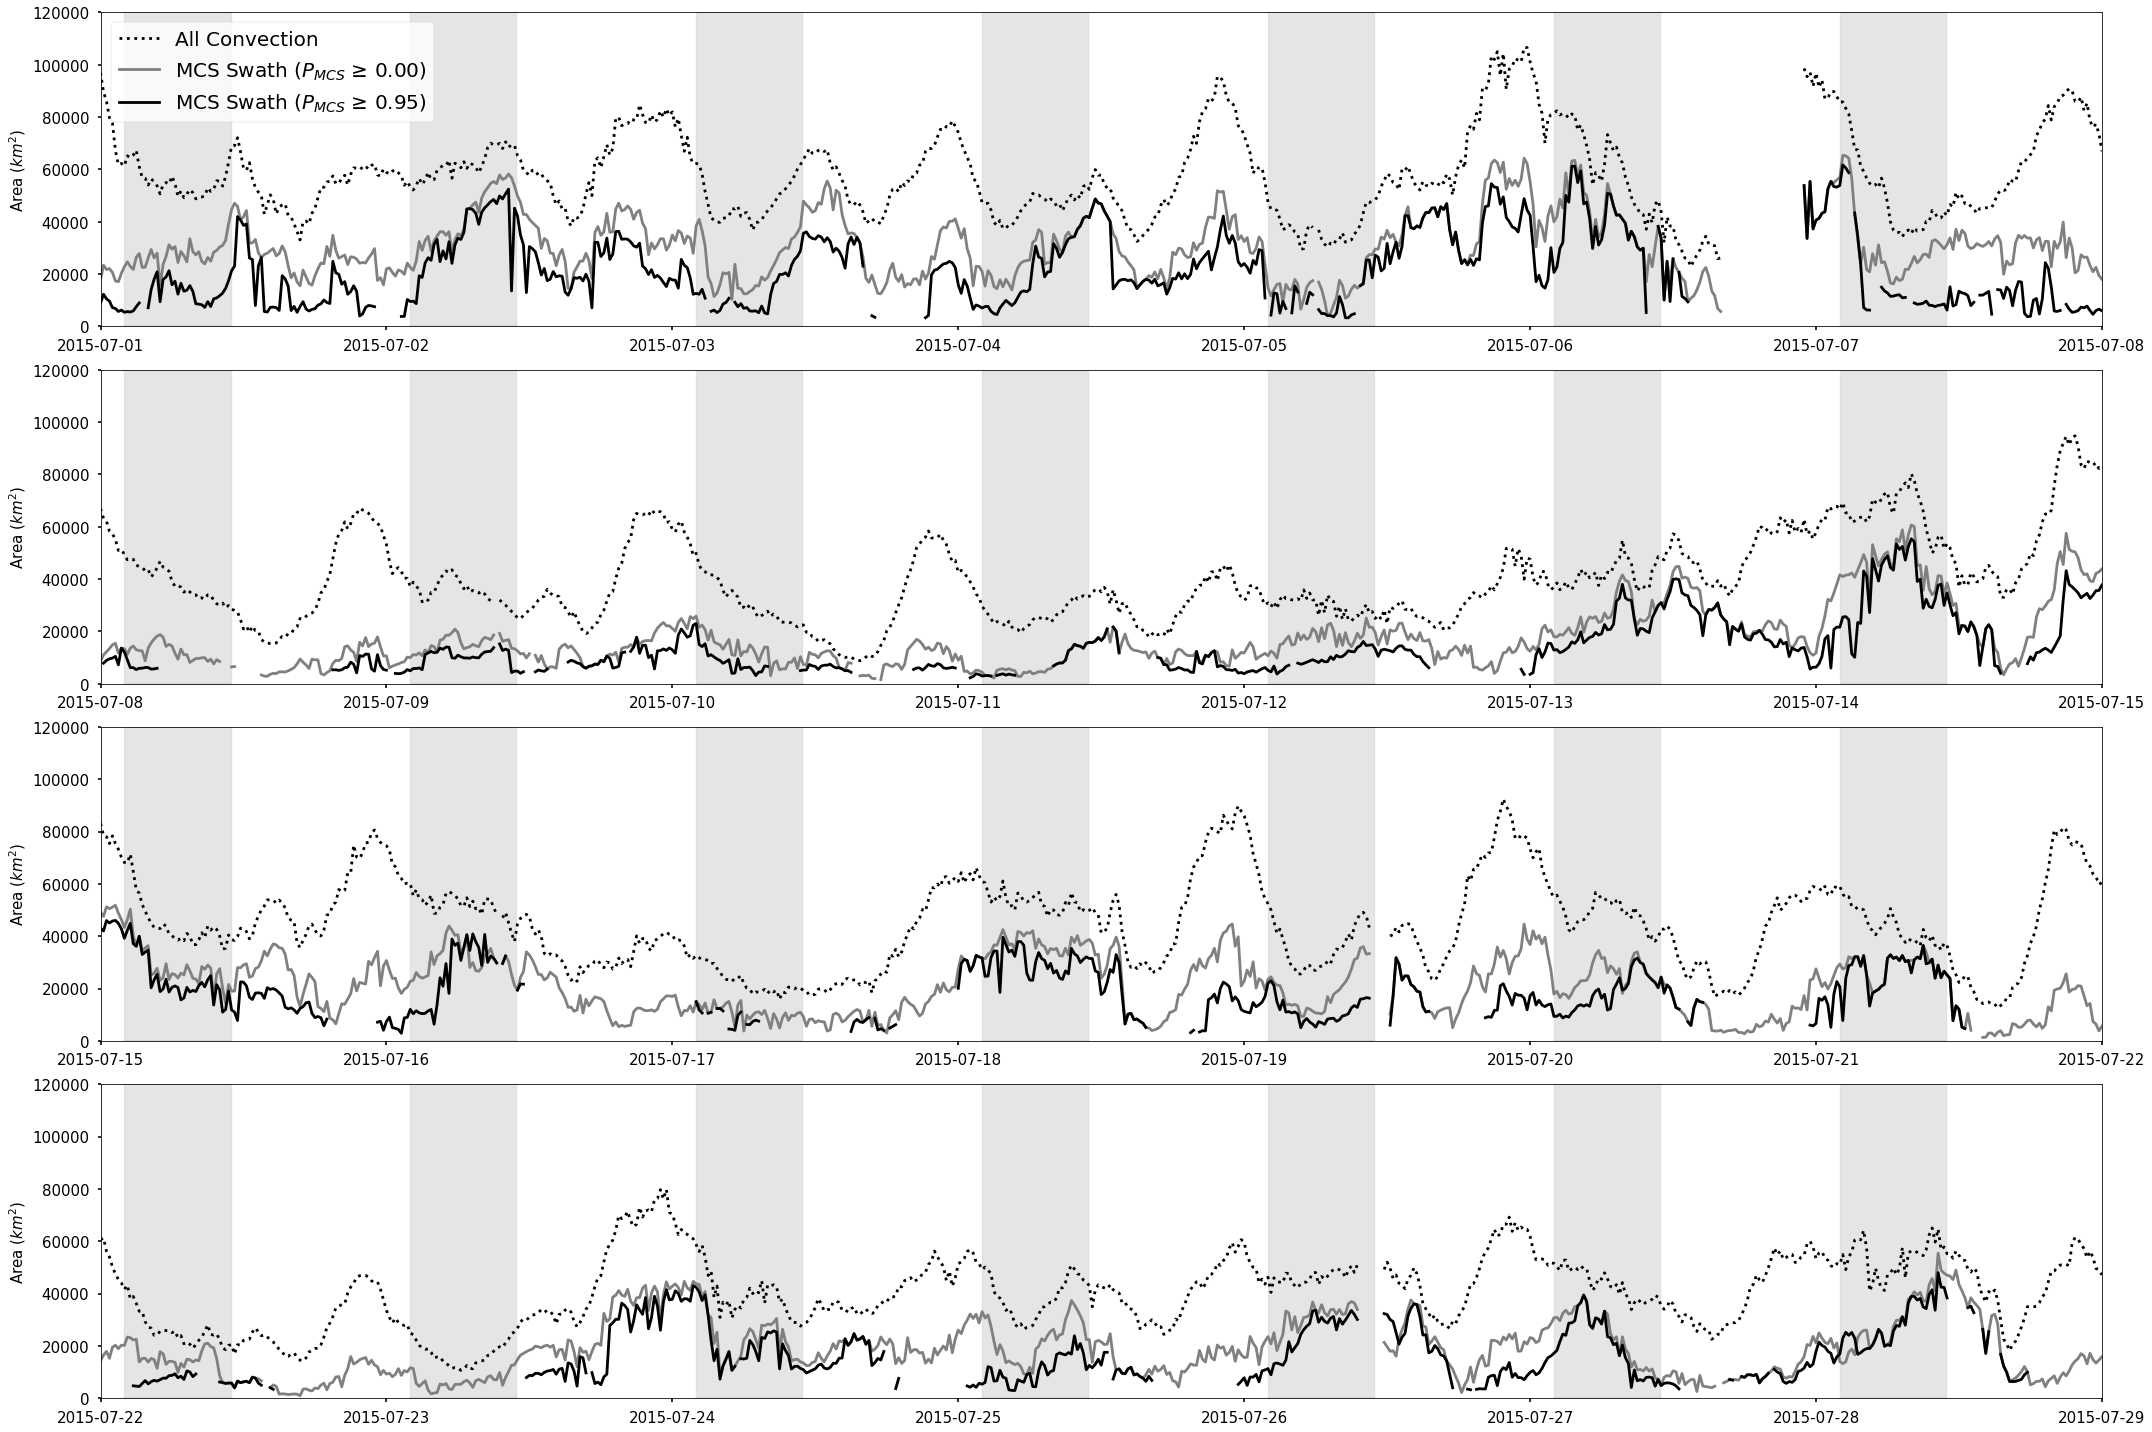

In [6]:
import matplotlib.dates as mdates
import datetime
import pickle
from pandas.tseries import converter as pdtc
pdtc.register()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 30, 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'

crsr = 24
ssr = 96
p = 0

for splot, date in enumerate([1, 8, 15, 22]):
    
    ax = plt.subplot(4, 1, splot+1)
    
    stime = datetime.datetime(2015, 7, date, 0, 0)
    etime = datetime.datetime(2015, 7, date+7, 0, 0)

    fi = file_info[(file_info.CRSR==crsr) & \
                   (file_info.SSR==ssr) & \
                   (file_info.index >= stime) & \
                   (file_info.index <= etime)]

    df_0_15 = fi.resample('15Min').sum()

    plt.plot(df_0_15.index.values, 4*df_0_15.conv_area.values, 'k:', label='All Convection')

    df_0 = get_track_data(stime, etime, crsr, ssr, p=0.0)
    df_0 = set_durations(df_0)
    df_0 = df_0[df_0.duration >= 3]

    df_0_15 = df_0.resample('15Min').sum()

    ax.plot(df_0_15.index.values, df_0_15.convection_area.values, '-', 
             color='grey', label="MCS Swath (" + r'$P_{MCS}$' + " ≥ 0.00)")


    df_95 = get_track_data(stime, etime, crsr, ssr, p=0.95)
    df_95 = set_durations(df_95)
    df_95 = df_95[df_95.duration >= 3]

    df_95_15 = df_95.resample('15Min').sum()

    ax.plot(df_95_15.index.values, df_95_15.convection_area.values, 'k-', 
              label="MCS Swath (" + r'$P_{MCS}$' + " ≥ 0.95)")


    s = stime + datetime.timedelta(hours=2)
    e = stime + datetime.timedelta(hours=11)

    while s < etime:

        ax.fill_between([s, e, e, s, s], [0, 0, 200000, 200000, 0], color='grey', alpha=0.2)

        s += datetime.timedelta(hours=24)
        e += datetime.timedelta(hours=24)

    ax.set_ylim(0, 120000)
    ax.set_xlim(stime, etime)
    ax.set_ylabel("Area (" + r'$km^2$' + ")", fontsize=15)
    
    if splot == 0:
        ax.legend(prop={'size': 20})
    
plt.tight_layout()

# Ok fine, August too. 

Notes:

The MCS the evening of August 2nd (Early August 3rd UTC) is one of the most MCS-y MCS, based on MCS Probability.

A hot radar the evening of August 3rd (Early August 4th UTC) causes a large area of "convective" coverage.

An overnight MCS on August 4th (Early August 5th UTC) doesn't really get going until 0900 UTC!

August 10th to morning August 11th is a great example of the diurnal evolution of isolated convection developing upscale into a few MCS overnight--and all east of the Mississippi! 

August 18th-19th is a great example of multiple MCSs propagating overnight and decaying in the morning and early afternoon, just as an expansive area of isolated convection develops.

A very unusual MCS forms over eastern Kansas on the morning of August 27th.  It is odd for both its time of initiation (10 UTC) and its morphology (No Stratiform/Areal/Leading Stratiform hybrid).

C:\Users\ahaberlie\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  """


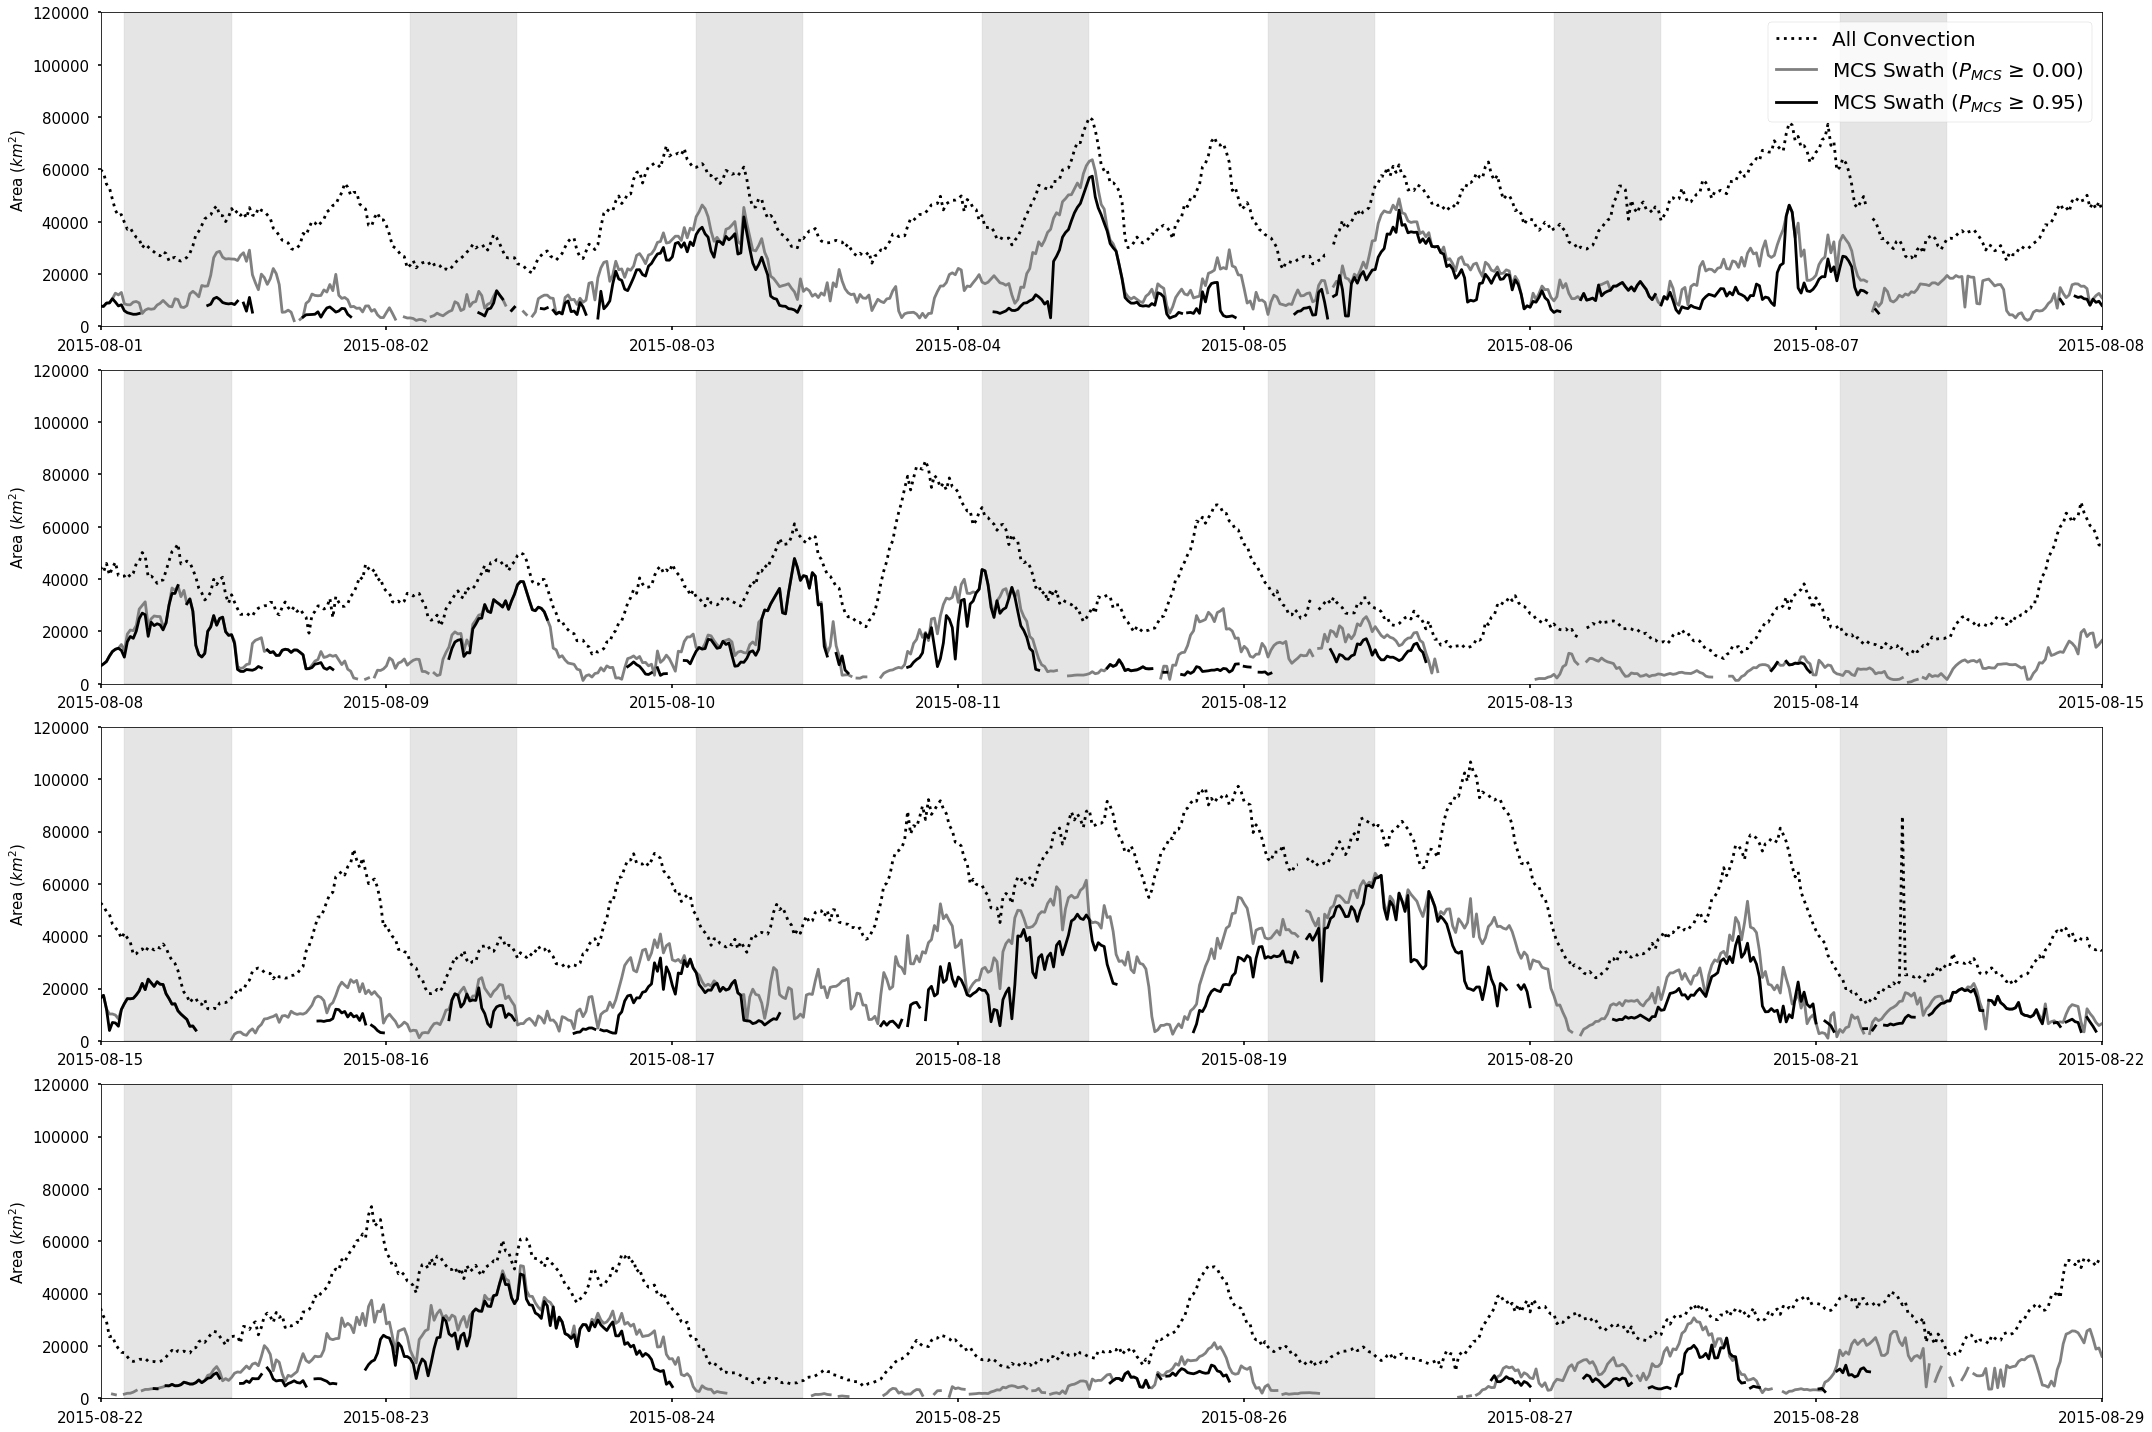

In [7]:
import matplotlib.dates as mdates
import datetime
import pickle
from pandas.tseries import converter as pdtc
pdtc.register()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 30, 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'

crsr = 24
ssr = 96
p = 0

for splot, date in enumerate([1, 8, 15, 22]):
    
    ax = plt.subplot(4, 1, splot+1)
    
    stime = datetime.datetime(2015, 8, date, 0, 0)
    etime = datetime.datetime(2015, 8, date+7, 0, 0)

    fi = file_info[(file_info.CRSR==crsr) & \
                   (file_info.SSR==ssr) & \
                   (file_info.index >= stime) & \
                   (file_info.index <= etime)]

    df_0_15 = fi.resample('15Min').sum()

    plt.plot(df_0_15.index.values, 4*df_0_15.conv_area.values, 'k:', label='All Convection')

    df_0 = get_track_data(stime, etime, crsr, ssr, p=0.0)
    df_0 = set_durations(df_0)
    df_0 = df_0[df_0.duration >= 3]

    df_0_15 = df_0.resample('15Min').sum()

    ax.plot(df_0_15.index.values, df_0_15.convection_area.values, '-', 
             color='grey', label="MCS Swath (" + r'$P_{MCS}$' + " ≥ 0.00)")


    df_95 = get_track_data(stime, etime, crsr, ssr, p=0.95)
    df_95 = set_durations(df_95)
    df_95 = df_95[df_95.duration >= 3]

    df_95_15 = df_95.resample('15Min').sum()

    ax.plot(df_95_15.index.values, df_95_15.convection_area.values, 'k-', 
              label="MCS Swath (" + r'$P_{MCS}$' + " ≥ 0.95)")


    s = stime + datetime.timedelta(hours=2)
    e = stime + datetime.timedelta(hours=11)

    while s < etime:

        ax.fill_between([s, e, e, s, s], [0, 0, 200000, 200000, 0], color='grey', alpha=0.2)

        s += datetime.timedelta(hours=24)
        e += datetime.timedelta(hours=24)

    ax.set_ylim(0, 120000)
    ax.set_xlim(stime, etime)
    ax.set_ylabel("Area (" + r'$km^2$' + ")", fontsize=15)
    
    if splot == 0:
        ax.legend(prop={'size': 20})
    
plt.tight_layout()